In [1]:
7+5

12

In [2]:
list_of_fruit=['oranges','apples','kiwi']

In [3]:
print(list_of_fruit)

['oranges', 'apples', 'kiwi']


In [4]:
print('oranges')

oranges


In [5]:
list_of_fruit[0]

'oranges'

In [7]:
list_of_fruit

['oranges', 'apples', 'kiwi']

In [8]:
list_of_fruit.append(7)

In [9]:
list_of_fruit

['oranges', 'apples', 'kiwi', 7]

In [10]:
list_of_fruit[3]

7

In [11]:
list_of_fruit[0:2]

['oranges', 'apples']

In [12]:
list_of_fruit[0:3]

['oranges', 'apples', 'kiwi']

In [13]:
import numpy

In [36]:
A=numpy.zeros((2,2))

In [18]:
numpy.shape(A)

(2, 2)

In [19]:
A

array([[0., 0.],
       [0., 0.]])

In [20]:
A[0,1]=1

In [21]:
A

array([[0., 1.],
       [0., 0.]])

In [22]:
A[1,0]=1

In [23]:
A

array([[0., 1.],
       [1., 0.]])

In [1]:
import matplotlib.pyplot as plt

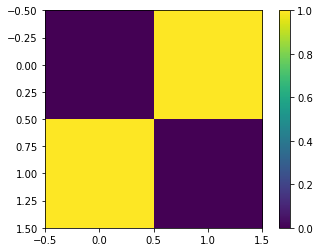

In [27]:
plt.imshow(A)
plt.colorbar()

In [28]:
A

array([[0., 1.],
       [1., 0.]])

In [29]:
A[1,0]=.2

In [30]:
A

array([[0. , 1. ],
       [0.2, 0. ]])

In [31]:
numpy.mean(A)

0.3

In [32]:
A=numpy.mean(A,axis=0)

In [33]:
A

array([0.1, 0.5])

In [35]:
numpy.mean(A,axis=1)

IndexError: tuple index out of range

In [37]:
A=numpy.zeros((2,2))

In [38]:
A

array([[0., 0.],
       [0., 0.]])

In [39]:
numpy.mean(A,axis=1)

array([0., 0.])

In [40]:
#let's bring in some real data

In [2]:
import filehandling as fh

In [42]:
ls

Untitled.ipynb           anim3dt.pck              imaging_exercises.ipynb
Untitled1.ipynb          boot_camp_intro.ipynb    meta_dt_anim1.pck
__pycache__/             example polygon.ipynb    tst
alldt_anim1.pck          filehandling.py


In [3]:
multiple_tifstacks=fh.open_pickle('alldt_anim1.pck')

pickle_name is alldt_anim1.pck


In [45]:
pwd

'/Users/tim/Desktop/ion_boot_camp/imaging'

In [5]:
import numpy
numpy.shape(multiple_tifstacks)

(4, 125, 100, 150)

In [48]:
multiple_tifstacks[3,100,75,67]

1816

In [7]:
single_frame=multiple_tifstacks[0,60,:,:]

In [8]:
numpy.shape(single_frame)

(100, 150)

In [9]:
import matplotlib.pyplot as plt

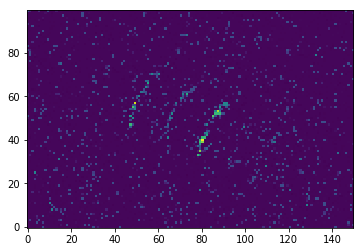

In [10]:
plt.imshow(single_frame,origin='lower')

In [11]:
#multiple_tifstacks is all experiments
first_tifstack=multiple_tifstacks[0,:,:,:]

In [12]:
numpy.shape(first_tifstack)

(125, 100, 150)

In [57]:
mean_across_frames_of_first_tifstack=numpy.mean(first_tifstack)

In [58]:
mean_across_frames_of_first_tifstack

293.0318650666667

In [13]:
mean_across_frames_of_first_tifstack=numpy.mean(first_tifstack,axis=0)

In [60]:
numpy.shape(mean_across_frames_of_first_tifstack)

(100, 150)

<IPython.core.display.Javascript object>


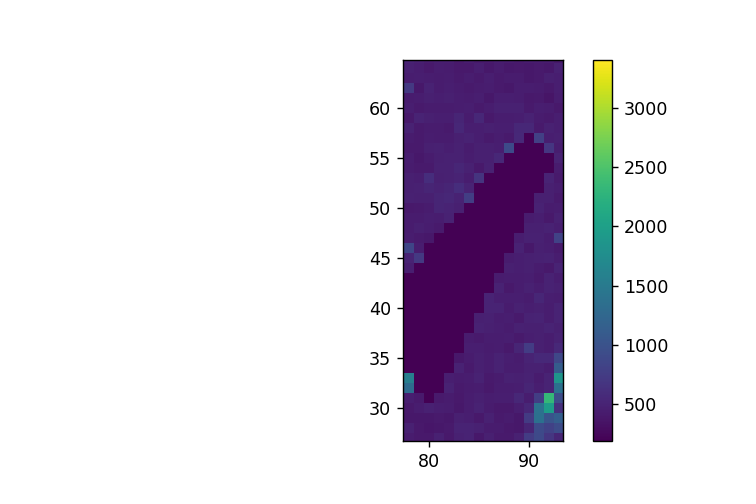

In [19]:
%matplotlib notebook
plt.imshow(mean_across_frames_of_first_tifstack,origin='lower')
plt.colorbar()

In [20]:
from skimage.draw import polygon

In [28]:
vertical_corners=numpy.array([30,55,58,40])
print(vertical_corners)
horizontal_corners=numpy.array([80,93,90,75])
print(horizontal_corners)

[30 55 58 40]
[80 93 90 75]


In [29]:
vert_inds,horiz_inds=polygon(vertical_corners,horizontal_corners)

In [38]:
mean_across_frames_of_first_tifstack[vert_inds,horiz_inds]=5000

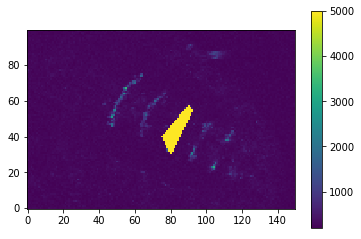

In [39]:
%matplotlib inline
plt.imshow(mean_across_frames_of_first_tifstack,origin='lower')
plt.colorbar()

In [8]:
mncopy=mean_across_frames_of_first_tifstack

NameError: name 'mean_across_frames_of_first_tifstack' is not defined

In [37]:
numpy.shape(vert_inds)

(179,)

In [41]:
mean_across_frames_of_first_tifstack[vert_inds,horiz_inds]=-100

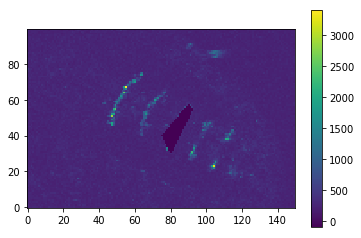

In [42]:
%matplotlib inline
plt.imshow(mean_across_frames_of_first_tifstack,origin='lower')
plt.colorbar()

In [43]:
whos

Variable                               Type        Data/Info
------------------------------------------------------------
fh                                     module      <module 'filehandling' fr<...>imaging/filehandling.py'>
first_tifstack                         ndarray     125x100x150: 1875000 elems, type `uint16`, 3750000 bytes (3.5762786865234375 Mb)
horiz_inds                             ndarray     179: 179 elems, type `int64`, 1432 bytes
horizontal_corners                     ndarray     4: 4 elems, type `int64`, 32 bytes
mean_across_frames_of_first_tifstack   ndarray     100x150: 15000 elems, type `float64`, 120000 bytes (117.1875 kb)
multiple_tifstacks                     ndarray     4x125x100x150: 7500000 elems, type `uint16`, 15000000 bytes (14.30511474609375 Mb)
numpy                                  module      <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt                                    module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py

In [44]:
values_within_our_region=first_tifstack[:,vert_inds,horiz_inds]

In [45]:
numpy.shape(values_within_our_region)

(125, 179)

In [46]:
numpy.mean(values_within_our_region)

546.6468826815642

In [51]:
mean_for_each_frame=numpy.mean(values_within_our_region,axis=1)

In [52]:
numpy.shape(mean_for_each_frame)

(125,)

Text(0, 0.5, 'brightness within 3rd segment ROI')

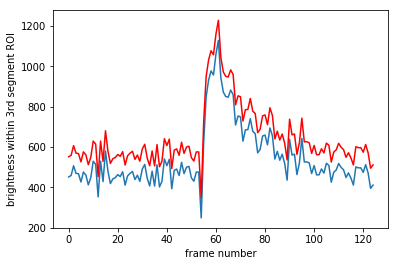

In [69]:
plt.plot(mean_for_each_frame)
plt.plot(mean_for_each_frame+100,'r')
plt.xlabel('frame number')
plt.ylabel('brightness within 3rd segment ROI')

In [57]:
meta_data=fh.open_pickle('meta_dt_anim1.pck')

pickle_name is meta_dt_anim1.pck


In [58]:
meta_data.keys()

dict_keys(['time_between_frames', 'microns_per_pixel', 'stim_frame'])

In [60]:
tm_between_frames=meta_data['time_between_frames']

In [61]:
print(tm_between_frames)

0.12625


In [62]:
1/tm_between_frames

7.920792079207921

In [64]:
#using np.arange to define a series of evenly spaced values that go from
#min to max
timevls=numpy.arange(0,125*tm_between_frames,tm_between_frames)

In [65]:
numpy.shape(timevls)

(125,)

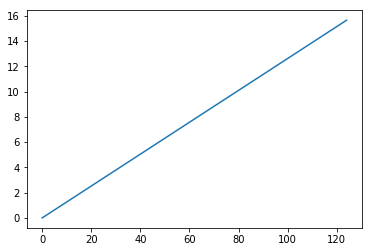

In [66]:
plt.plot(timevls)

Text(0, 0.5, 'brightness within 3rd segment ROI')

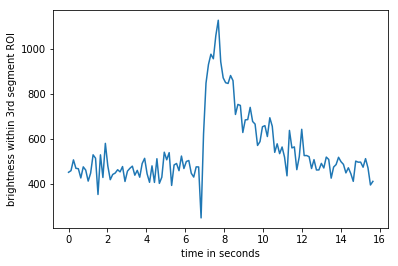

In [67]:
plt.plot(timevls,mean_for_each_frame)
plt.xlabel('time in seconds')
plt.ylabel('brightness within 3rd segment ROI')